# SD212: Graph mining
## Lab 4: PageRank

In this lab, you will learn how to compute, use and interpret various PageRank metrics.

# Don't forget to use directed graphs with PageRank : nx.DiGraph(graph)

## Import

In [1]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [2]:
import numpy as np

In [3]:
from scipy import sparse as sp

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt

**Note:** The following magic command provides interactive plots (e.g., for zooming in/out).<br>
Any new figure must by declared by the command ```plt.figure()```

In [6]:
# %matplotlib inline
%matplotlib notebook

## Data

You will need the following datasets (the same as in previous labs, no need to download them again):
* [Les Misérables](http://perso.telecom-paristech.fr/~bonald/graphs/miserables.graphml.gz)<br>  Graph connecting the characters of the [novel of Victor Hugo](https://fr.wikisource.org/wiki/Les_Misérables) when they appear in the same chapter. The graph is undirected and weighted. Weights correspond to the number of chapters in which characters appear together. 
* [Openflights](http://perso.telecom-paristech.fr/~bonald/graphs/openflights.graphml.gz)<br>
Graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Extracted from [Openflights](http://openflights.org).
* [Wikipedia for schools](http://perso.telecom-paristech.fr/~bonald/graphs/wikipedia_schools.graphml.gz)<br> Graph of the hyperlinks between a subset of the pages of the English Wikipedia. The graph is directed and unweighted.
More information [here](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools)
* [Actors-Movies](http://perso.telecom-paristech.fr/~bonald/graphs/actors_movies.graphml.gz)<br>
Graph between actors and movies (a link exists if the actor stars in the movie). The graph is bipartite (see the field 'type' of each node). 
Extracted from [YaGo](http://yago-knowledge.org).



## 1. PageRank

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution uniform over the set of nodes.

## Toy graph

Consider the following graph:

In [7]:
toy_graph = nx.DiGraph()
edgelist = [(7,5),(5,3),(3,7),(4,5),(4,6),(7,4),(1,6),(9,8),(7,8),(6,1),(2,9),(8,2)]
toy_graph.add_edges_from(edgelist)

<IPython.core.display.Javascript object>


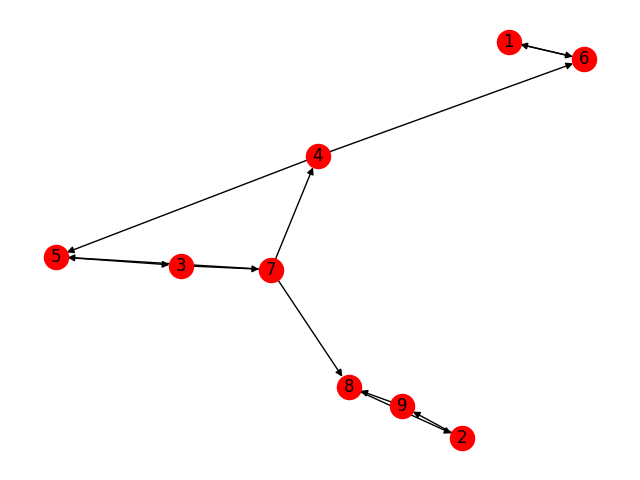

In [8]:
plt.figure()
nx.draw(toy_graph, with_labels = True)

## To do

* Guess the best ranked node of this graph.
* Check the PageRank of each node using the```pagerank``` function of ```networkx``` and interpret the results.
* Add edges 2->5 and 6->3 and observe the impact on the top-3 nodes.


In [22]:
import numpy as np
d = dict(nx.pagerank(G=toy_graph,alpha=0.85))
print("Best ranked node : "+str(max(d, key=d.get))) # best ranked node

Best ranked node : 3


In [23]:
toy_graph.add_edge(u_of_edge=2,v_of_edge=5)
toy_graph.add_edge(u_of_edge=6,v_of_edge=3)

<IPython.core.display.Javascript object>


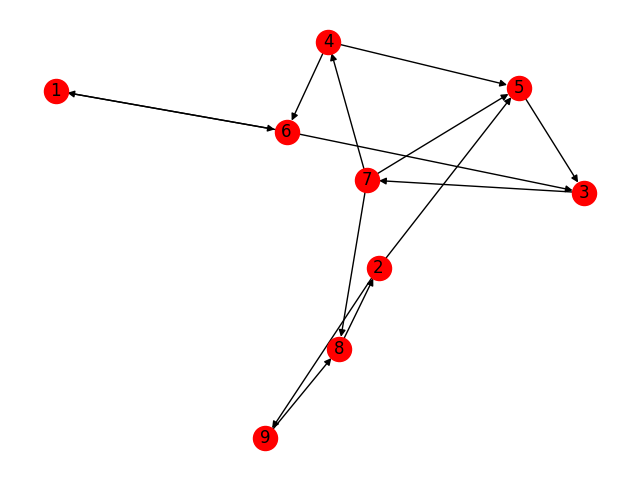

In [24]:
plt.figure()
nx.draw(toy_graph, with_labels = True)

In [46]:
d = dict(nx.pagerank(G=toy_graph,alpha=0.85))
print("Best ranked node : "+str(max(d, key=d.get))) # best ranked node

Best ranked node : 3


## Path graph

Now consider a path graph:

In [47]:
n = 10
path_graph = nx.path_graph(n)
pos = [(i,0) for i in range(n)]

<IPython.core.display.Javascript object>


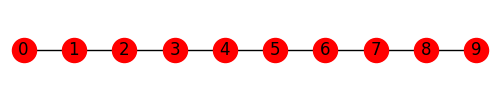

In [48]:
plt.figure(figsize=(5,1))
nx.draw(path_graph,pos,with_labels = True)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the exact PageRank vector when $\alpha=1$?

In [49]:
d = dict(nx.pagerank(G=path_graph,alpha=0.85))
probas = [d[i] for i in range(len(d.keys()))]
probas

[0.06438475238742992,
 0.1161980205543576,
 0.10934610989479174,
 0.10579068620906135,
 0.10428043095435946,
 0.10428043095435947,
 0.10579068620906133,
 0.10934610989479172,
 0.1161980205543576,
 0.06438475238742991]

In [50]:
import operator
[operator.itemgetter(0)(t) for t in sorted(enumerate(probas,1), key=operator.itemgetter(1))] #list of ranks of the 

[10, 1, 5, 6, 7, 4, 8, 3, 2, 9]

In [51]:
ranking = [operator.itemgetter(0)(t) for t in sorted(enumerate(probas,1), key=operator.itemgetter(1))] #list of the ranks
print('Best ranked node : '+ str(ranking.index(1)))
print('Second best ranked node : '+ str(ranking.index(2)))

Best ranked node : 1
Second best ranked node : 8


In [52]:
#We try with different values of alpha
alpha = 0.84
print("For alpha = "+str(alpha))
d = dict(nx.pagerank(G=path_graph,alpha=alpha))
probas = [d[i] for i in range(len(d.keys()))]
[operator.itemgetter(0)(t) for t in sorted(enumerate(probas,1), key=operator.itemgetter(1))]
ranking = [operator.itemgetter(0)(t) for t in sorted(enumerate(probas,1), key=operator.itemgetter(1))] #list of the ranks
print('Best ranked node : '+ str(ranking.index(1)))
print('Second best ranked node : '+ str(ranking.index(2)))

For alpha = 0.84
Best ranked node : 0
Second best ranked node : 8


Quite interesting : $\alpha = 0.85 $ is the value for which the 1 node becomes better ranked than the 0 node

## Les Misérables


In [53]:
miserables = nx.DiGraph(nx.read_graphml("miserables.graphml", node_type = int))

In [54]:
names = nx.get_node_attributes(miserables, 'name')
weights = nx.get_edge_attributes(miserables, 'weight')
width = [weights[e] / 2 for e in miserables.edges()]

<IPython.core.display.Javascript object>


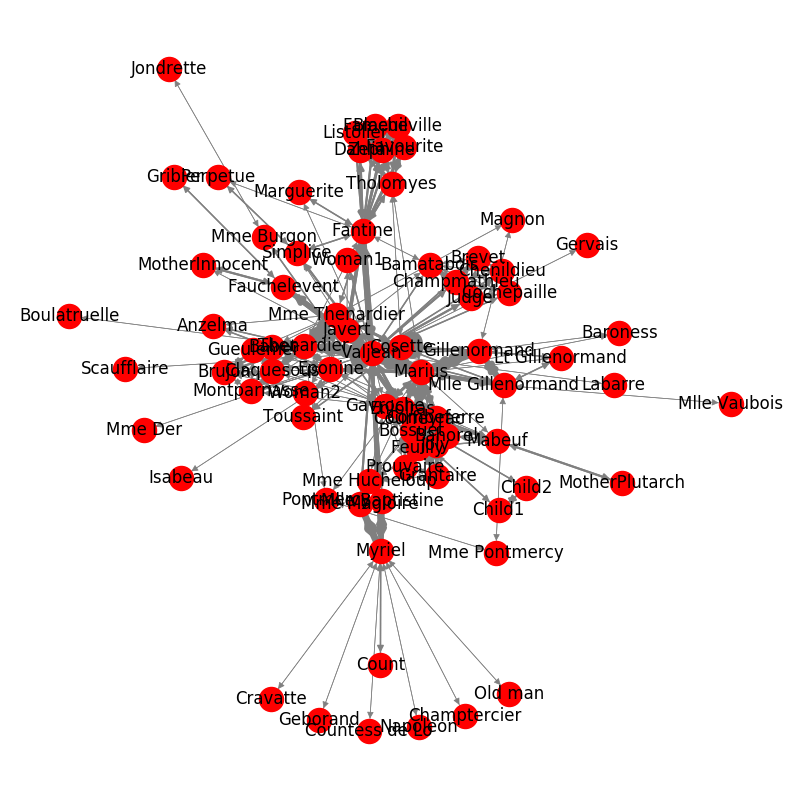

In [55]:
plt.figure(figsize = (8,8))
nx.draw(miserables, labels = names, width = width, edge_color = 'grey')

## To do

* List the 10 best ranked nodes of Les Misérables.
* Compare with the 10 nodes of highest degrees and the 10 nodes of highest weights.
* Try different values of $\alpha$ and interpret the results.

In [56]:
#We try with different values of alpha
alpha = 0.85
print("For alpha = "+str(alpha))
d = dict(nx.pagerank(G=miserables,alpha=alpha))
probas = [d[i] for i in range(len(d.keys()))]
[operator.itemgetter(0)(t) for t in sorted(enumerate(probas,1), key=operator.itemgetter(1))]
ranking = [operator.itemgetter(0)(t) for t in sorted(enumerate(probas,1), key=operator.itemgetter(1))] #list of the ranks
print('Best ranked node : '+ str(ranking.index(1)))

L = [ranking.index(i) for i in range(1,11)]
print(L)

For alpha = 0.85
Best ranked node : 74
[74, 9, 60, 63, 10, 11, 12, 13, 23, 14]


In [57]:
degrees = [x[1] for x in list(miserables.in_degree)]
ranking = [operator.itemgetter(0)(t) for t in sorted(enumerate(degrees,1), key=operator.itemgetter(1))] #list of the ranks
L = [ranking.index(i) for i in range(1,11)]
print("Highest in degree node : "+str(L[0]))
print(L)

Highest in degree node : 55
[55, 0, 27, 28, 1, 2, 3, 4, 5, 6]


## Openflights


In [85]:
openflights = nx.DiGraph(nx.read_graphml("openflights.graphml", node_type = int))

In [86]:
# Get positions
pos_x = nx.get_node_attributes(openflights,'pos_x')
pos_y = nx.get_node_attributes(openflights,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openflights}

<IPython.core.display.Javascript object>


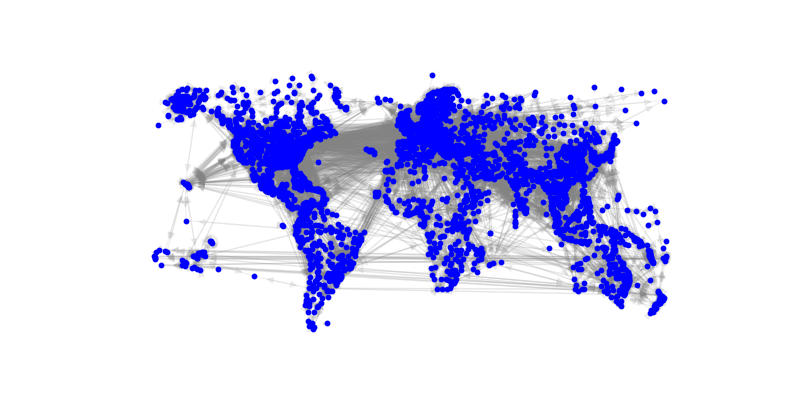

In [87]:
plt.figure(figsize=(8,4))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_edges(openflights, pos, alpha = .1, edge_color = 'grey')
plt.show()

## To do

* List and display the 10 best ranked airports.
* Compare with the 10 airports of highest traffic.

In [61]:
#We try with different values of alpha
alpha = 0.85
print("For alpha = "+str(alpha))
d = dict(nx.pagerank(G=miserables,alpha=alpha))
probas = [d[i] for i in range(len(d.keys()))]
[operator.itemgetter(0)(t) for t in sorted(enumerate(probas,1), key=operator.itemgetter(1))]
ranking = [operator.itemgetter(0)(t) for t in sorted(enumerate(probas,1), key=operator.itemgetter(1))] #list of the ranks
print('Best ranked node : '+ str(ranking.index(1)))

L = [ranking.index(i) for i in range(1,11)]
print(L)

For alpha = 0.85
Best ranked node : 74
[74, 9, 60, 63, 10, 11, 12, 13, 23, 14]


<IPython.core.display.Javascript object>


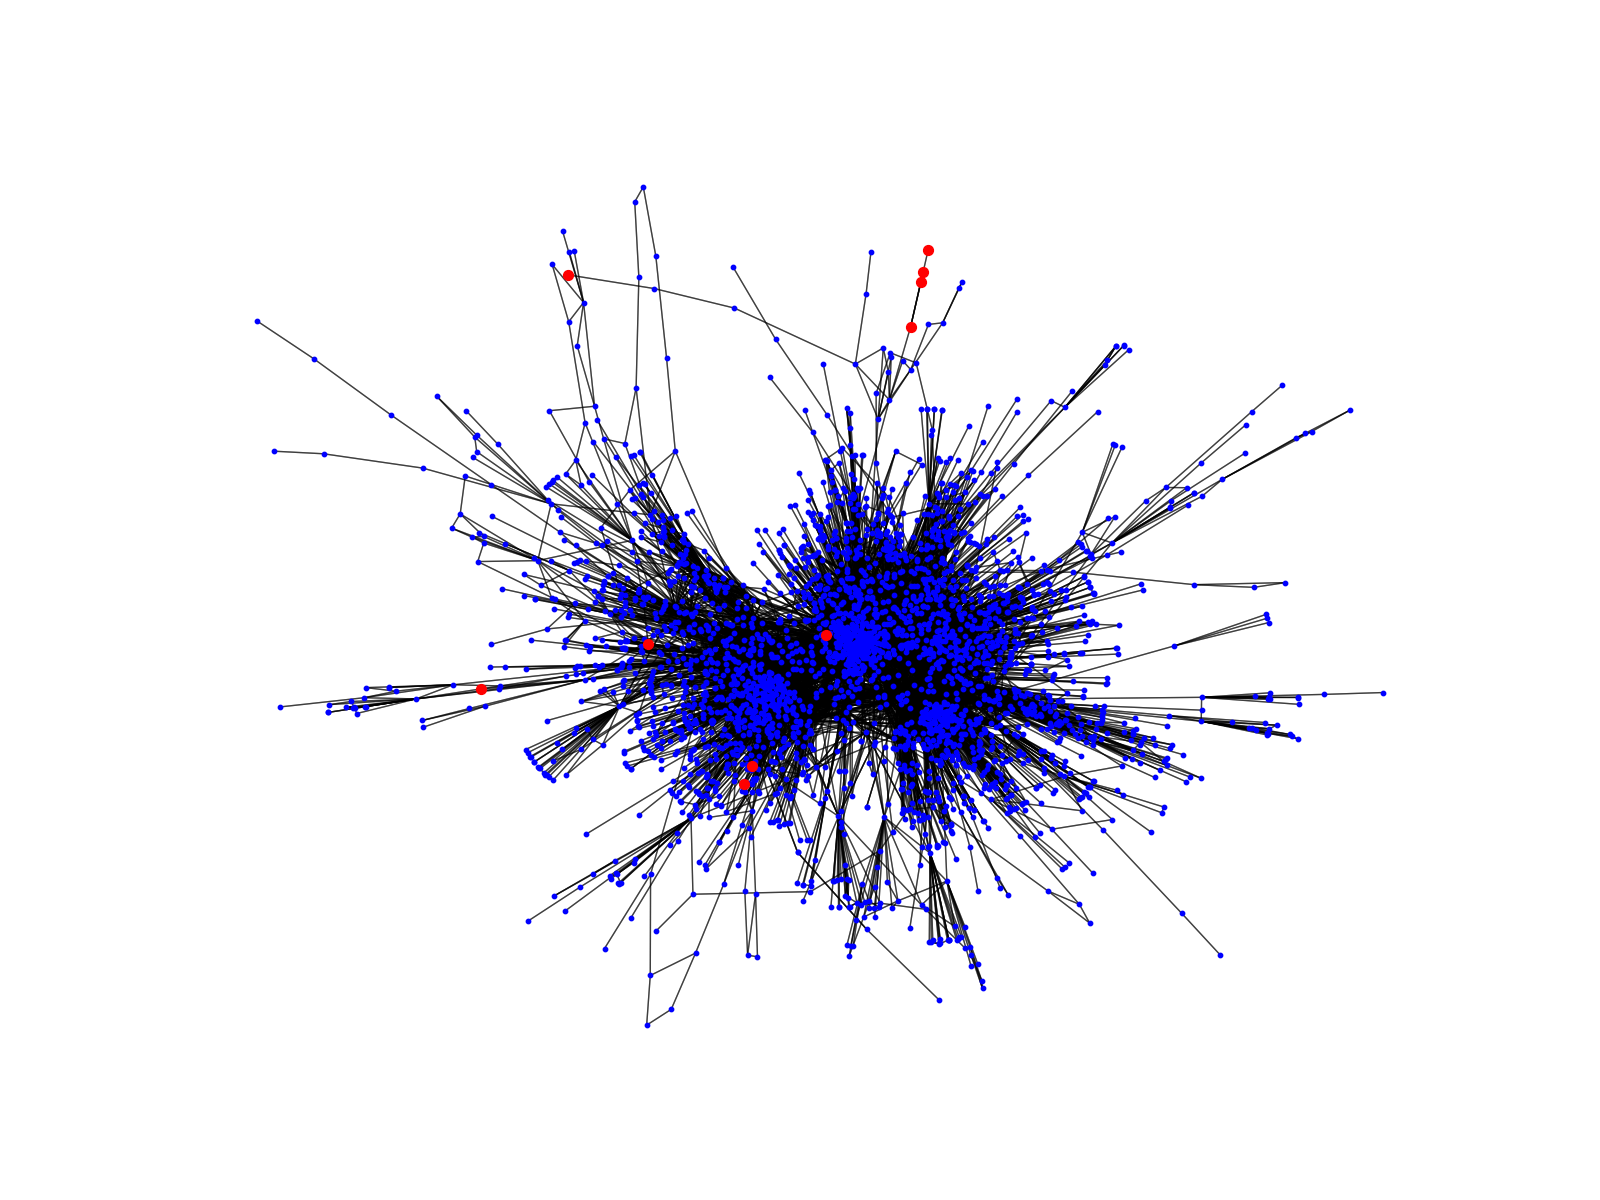

In [62]:
# Visualization
plt.figure(figsize=(16,12))
plt.axis('off')
pos = nx.spring_layout(openflights)
path = nx.shortest_path(G=openflights,source=0,target=2277)
nx.draw_networkx_nodes(openflights,pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(openflights,pos, nodelist = L, node_size = 50, node_color = 'r')
edges = nx.draw_networkx_edges(openflights,pos, arrows = False, alpha = 0.5)
plt.show()

In [63]:
degrees = [x[1] for x in list(openflights.in_degree)]
ranking = [operator.itemgetter(0)(t) for t in sorted(enumerate(degrees,1), key=operator.itemgetter(1))] #list of the ranks
L = [ranking.index(i) for i in range(1,11)]
print("Highest degree node : "+str(L[0]))
print(L)

Highest degree node : 1687
[1687, 2154, 2233, 2308, 2793, 1688, 1898, 2234, 2155, 0]


## Wikipedia for Schools

In [64]:
wikipedia = nx.read_graphml("wikipedia_schools.graphml", node_type = int)

## To do

* List the 10 best ranked pages of Wikipedia for Schools.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees.
* Which article of Wikipedia for School is in the top-10 in terms of PageRank but not in the top-10 in terms of in-degree?

In [65]:
#We try with different values of alpha
alpha = 0.85
print("For alpha = "+str(alpha))
d = dict(nx.pagerank(G=wikipedia,alpha=alpha))
probas = [d[i] for i in range(len(d.keys()))]
[operator.itemgetter(0)(t) for t in sorted(enumerate(probas,1), key=operator.itemgetter(1))]
ranking = [operator.itemgetter(0)(t) for t in sorted(enumerate(probas,1), key=operator.itemgetter(1))] #list of the ranks
print('Best ranked node : '+ str(ranking.index(1)))

L = [ranking.index(i) for i in range(1,11)]
print(L)

For alpha = 0.85
Best ranked node : 0
[0, 3463, 2761, 2564, 4511, 4539, 4099, 4375, 3745, 3344]


In [66]:
degrees = [x[1] for x in list(wikipedia.in_degree)]
ranking = [operator.itemgetter(0)(t) for t in sorted(enumerate(degrees,1), key=operator.itemgetter(1))] #list of the ranks
L = [ranking.index(i) for i in range(1,11)]
print("Highest in degree node : "+str(L[0]))
print(L)

Highest in degree node : 0
[0, 3496, 2716, 2802, 4497, 4557, 3961, 4315, 3462, 3195]


In [67]:
degrees = [x[1] for x in list(wikipedia.out_degree)]
ranking = [operator.itemgetter(0)(t) for t in sorted(enumerate(degrees,1), key=operator.itemgetter(1))] #list of the ranks
L = [ranking.index(i) for i in range(1,11)]
print("Highest out degree node : "+str(L[0]))
print(L)

Highest out degree node : 1029
[1029, 1192, 875, 2072, 3524, 4387, 4030, 4525, 3525, 2735]


In [68]:
#We try with different values of alpha
alpha = 0.85
print("For alpha = "+str(alpha))
d = dict(nx.pagerank(G=wikipedia,alpha=alpha))
probas = [d[i] for i in range(len(d.keys()))]
[operator.itemgetter(0)(t) for t in sorted(enumerate(probas,1), key=operator.itemgetter(1))]
ranking = [operator.itemgetter(0)(t) for t in sorted(enumerate(probas,1), key=operator.itemgetter(1))] #list of the ranks
print('Best ranked node : '+ str(ranking.index(1)))

L = [ranking.index(i) for i in range(1,11)]
print(L)

For alpha = 0.85
Best ranked node : 0
[0, 3463, 2761, 2564, 4511, 4539, 4099, 4375, 3745, 3344]


The best ranked nodes are close to the ones with highest in-degree

## 2. Personalized PageRank

The personalized PageRank provides local ranking with respect to some target node(s). 

## To do

Using the ```pagerank``` function of ```networkx```:
* List the 5 closest characters to **Cosette** in Les Miserables.
* List the 10 closest airports to **Charles de Gaulle** in Openflights.
* List the 20 closest pages to **Picasso** in Wikipedia for Schools. What is the best ranked painter other than Picasso?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia for Schools.
* List the 10 closest actors to **Marion Cotillard** in the Actors-Movies graph.

In [69]:
# Get nodes from string (case sensitive)
def get_node_from_string(graph, word):
    nodes = {}
    for u in graph:
        if graph.node[u]['name'].find(word) >= 0:
            nodes[u] = graph.node[u]['name']
    return nodes

In [70]:
# Sort a dictionary by values (decreasing order)
my_dict = {'a': 3, 'b': 8, 'c':1}
sorted(my_dict, key = my_dict.get, reverse = True)

['b', 'a', 'c']

In [71]:
openflights.nodes()[0]['name']

'Goroka Airport'

In [72]:
for i in range(len(openflights.nodes())):
    if "Gaulle" in openflights.nodes()[i]['name']:
        print(i)
        print(openflights.nodes()[i]['name'])

622
Charles de Gaulle International Airport


In [73]:
def get_closest(graph,word, nb_closest):
    L = [i for i in range(len(graph.nodes()))]
    d = dict((el,0) for el in L)
    n = list(get_node_from_string(graph,word).keys())[0]
    d[n] = 1
    alpha = 0.85
    perso_pagerank = nx.pagerank(graph,alpha=alpha,personalization=d)
    return np.array(sorted(perso_pagerank, key = perso_pagerank.get, reverse = True)).flatten()[1:nb_closest+1]
get_closest(miserables,"Cosette",5)


array([11, 55, 25, 58, 27])

In [74]:
get_closest(openflights,'Charles de Gaulle International Airport',10)

array([280, 183, 194, 251, 762, 286, 189, 564, 699, 502])

In [75]:
openflights.nodes()[280]['name']

'Amsterdam Airport Schiphol'

In [76]:
get_closest(wikipedia,'Picasso',20)

array([  38,   40,   31,  602,   98,   46,  121,  232, 2130,   50, 2107,
       1162,  821, 1843,  760,  102,  757, 2833, 3183,  183])

In [77]:
wikipedia.nodes()[38]['name']

'France'

## 3. Sparse matrices

You will now implement your own PageRank algorithm using sparse matrices.

The Personalized PageRank vector $\pi$ follows from $N$ iterations of the update:
$$
\pi \gets \alpha  P^T \pi + (1-\alpha)\mu,
$$
where $P$ is the transition matrix of the random walk and $\mu$ the personalization vector (summing to 1) used to restart the random walk.

Note that $\mu$ is also:
* the initial value for $\pi$,
* the restart distribution in the presence of sinks (i.e., the corresponding rows of $P$ are taken equal to $\mu$)

## To do

* Write a function returning the transition matrix $P$ (pay attention to the sinks!)
* Write a function returning the vector $\pi$ after $N$ iterations of the update.
* Write your own pagerank function, with the same parameters as that of  ```networkx``` (see below).
* Compare your function to that of ```networkx``` on Wikipedia for Schools (results, speed).

In [78]:
def get_transition_matrix(adjacency, n, restart = None):
    '''
    adjacency: scipy CSR matrix
        adjacency matrix of the graph
    restart: numpy array summing to 1
        If None, set to uniform distribution.
    '''
    adj_dense = adjacency.todense()
    n = adj_dense.shape[0]
    if restart is not None:
        restart = np.ones(n) / n
    # to be modified (you may need sp.diags and np.where)
    P = sp.csr_matrix((n,n))
    w_plus = []
    for i in range(n):
        summ = 0
        for j in range(n):
            summ = summ + adj_dense.__getitem__((i,j))
        w_plus.append(1.0/float(summ))
    D = sp.diags(w_plus, 0)
    P = D.dot(adj_dense)
    return P

In [79]:
def iteration(pi, P, n, alpha = 0.85, N = 20):
    pi_ = pi
    restart = np.ones(n) / float(n)
    for i in range(N):
        pi_ = alpha*pi.dot(P) + (1 - alpha) * restart
        pi = pi_
    return pi

In [80]:
def pagerank(graph, alpha = 0.85, personalization = None, N = 20):
    '''
    graph: networkx Graph (or DiGraph)
        Graph 
    alpha:
        damping factor    
    personalization: dictionary
        initial / restart distribution
    N: int
        number of iterations
    '''
    adjacency = nx.to_scipy_sparse_matrix(graph)
    n = adjacency.todense().shape[0]
    pi = np.ones(n) / n
    P = get_transition_matrix(adjacency, n)
    pi = iteration(pi, P, n, alpha, N)
    # to be modified
    pagerank = {u: 0 for u in graph}
    k=0
    for u in graph:
        pagerank[u] = pi.__getitem__((0,k))
        k = k + 1
    return pagerank

In [81]:
pagerank(miserables),nx.pagerank(miserables) #similar results, but MUCH faster

({0: 0.03927612254352314,
  1: 0.0030254682388462439,
  2: 0.017427657891195054,
  3: 0.019560421289801212,
  4: 0.0030254682388462439,
  5: 0.0030254682388462439,
  6: 0.0030254682388462439,
  7: 0.0030254682388462439,
  8: 0.0041028845296405391,
  9: 0.0030254682388462439,
  10: 0.0024839461767488932,
  11: 0.099600391315897041,
  12: 0.0034666058544646685,
  13: 0.0024839461767488932,
  14: 0.0024839461767488932,
  15: 0.0024839461767488932,
  16: 0.01406711761627122,
  17: 0.013158746956623443,
  18: 0.013158746956623444,
  19: 0.013631051729901858,
  20: 0.014131832886900069,
  21: 0.013656768606641905,
  22: 0.013184335985987136,
  23: 0.027167019319611577,
  24: 0.020045281299482728,
  25: 0.03569189607960728,
  26: 0.036919738218591791,
  27: 0.026829057809663055,
  28: 0.012759036358252212,
  29: 0.0089198388605148862,
  30: 0.0039871395101695175,
  31: 0.0072830881040120681,
  32: 0.0024839461767488932,
  33: 0.0035050829569004188,
  34: 0.011338596804611164,
  35: 0.01133859

## 4. Forward-Backward PageRank

The forward-backward pagerank is based on a random walk following edges in forward and backward directions, alternately. The ranking may differ significantly in directed graphs. 

## To do
* Complete the functions below to get the (Personalized) Forward-Backward PageRank vector.
* What is the closest page to **Picasso** in Wikipedia for Schools for the Personalized Forward-Backward PageRank?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia for Schools for the Personalized Forward-Backward PageRank.

In [82]:
def get_P_plus(dense, n):
    Matrix = [[0 for x in range(n)] for y in range(n)]
    w_plus = []
    for i in range(n):
        summ = 0
        for j in range(n):
            summ = summ + dense.__getitem__((i,j))
        w_plus.append(float(summ))
    for i in range(n):
        for j in range(n):
            Matrix[i][j] = dense.__getitem__((i,j))/w_plus[i]
    return Matrix

In [83]:
def get_P_moins(dense, n):
    Matrix = [[0 for x in range(n)] for y in range(n)]
    w_moins = []
    for i in range(n):
        summ = 0
        for j in range(n):
            summ = summ + dense.__getitem__((j,i))
        w_moins.append(float(summ))
    for i in range(n):
        for j in range(n):
            Matrix[i][j] = dense.__getitem__((i,j))/w_moins[i]
    return Matrix

In [84]:
def forward_backward_pagerank(graph, alpha = 0.85, personalization = None, N = 20):
    '''
    graph: networkx Graph (or DiGraph)
        Graph 
    alpha:
        damping factor    
    personalization: dictionary
        initial / restart distribution
    N: int
        number of iterations
    '''
    adjacency = nx.to_scipy_sparse_matrix(graph)
    dense = adjacency.todense()
    n = dense.shape[0]
    pi = np.ones(n) / float(n)
    Pp = get_P_plus(dense, n)
    Pm = get_P_moins(dense, n)
    for i in range(N):
        pi = pi.dot(Pp)
        pi = alpha*pi.dot(Pm) + (1-alpha)*(np.ones(n)/float(n))
    pagerank = {u: 0 for u in graph}
    k=0
    for u in graph:
        pagerank[u] = pi.__getitem__(k)
        k = k + 1
    return pagerank

In [97]:
forward_backward_pagerank(wikipedia)

{0: nan,
 1: nan,
 2: nan,
 3: nan,
 4: nan,
 5: nan,
 6: nan,
 7: nan,
 8: nan,
 9: nan,
 10: nan,
 11: nan,
 12: nan,
 13: nan,
 14: nan,
 15: nan,
 16: nan,
 17: nan,
 18: nan,
 19: nan,
 20: nan,
 21: nan,
 22: nan,
 23: nan,
 24: nan,
 25: nan,
 26: nan,
 27: nan,
 28: nan,
 29: nan,
 30: nan,
 31: nan,
 32: nan,
 33: nan,
 34: nan,
 35: nan,
 36: nan,
 37: nan,
 38: nan,
 39: nan,
 40: nan,
 41: nan,
 42: nan,
 43: nan,
 44: nan,
 45: nan,
 46: nan,
 47: nan,
 48: nan,
 49: nan,
 50: nan,
 51: nan,
 52: nan,
 53: nan,
 54: nan,
 55: nan,
 56: nan,
 57: nan,
 58: nan,
 59: nan,
 60: nan,
 61: nan,
 62: nan,
 63: nan,
 64: nan,
 65: nan,
 66: nan,
 67: nan,
 68: nan,
 69: nan,
 70: nan,
 71: nan,
 72: nan,
 73: nan,
 74: nan,
 75: nan,
 76: nan,
 77: nan,
 78: nan,
 79: nan,
 80: nan,
 81: nan,
 82: nan,
 83: nan,
 84: nan,
 85: nan,
 86: nan,
 87: nan,
 88: nan,
 89: nan,
 90: nan,
 91: nan,
 92: nan,
 93: nan,
 94: nan,
 95: nan,
 96: nan,
 97: nan,
 98: nan,
 99: nan,
 100: nan,